Feature sentiments saved to: feature_sentiments_styled.xlsx
Sentiment summary saved to: sentiment_summary_styled.xlsx


<Figure size 1200x800 with 0 Axes>

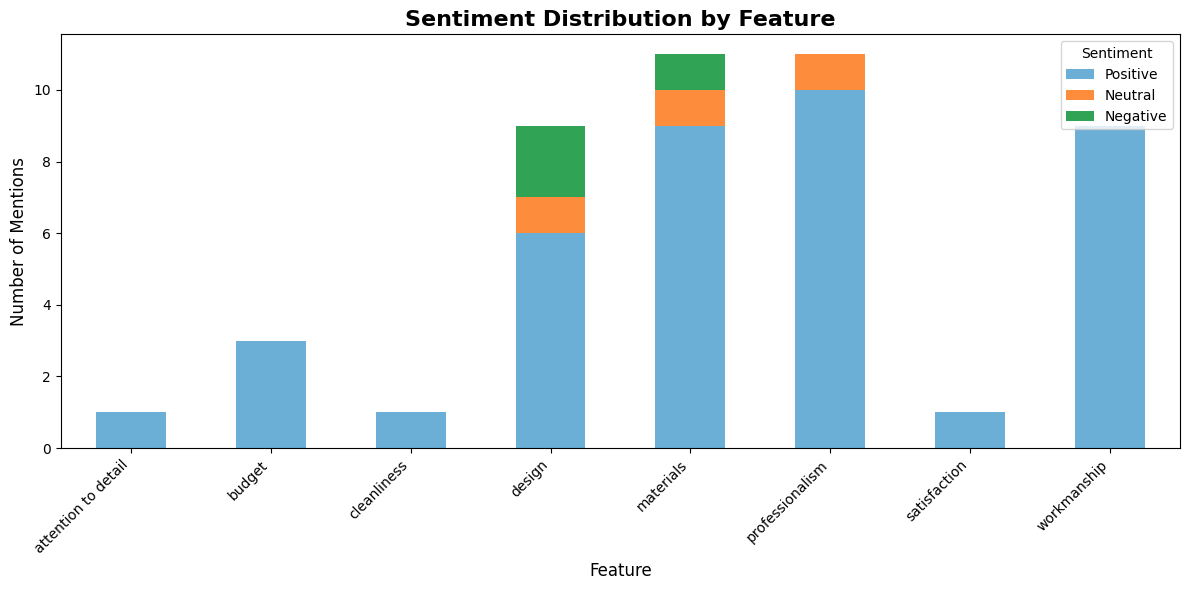

In [3]:
import pandas as pd
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


nlp = spacy.load('en_core_web_sm')


sia = SentimentIntensityAnalyzer()

# Define features relevant to home renovation
features = [
    "workmanship", "timeliness", "cleanliness", "attention to detail",
    "responsiveness", "professionalism", "customer support", "transparency",
    "pricing", "budget", "design", "aesthetics", "durability", "materials",
    "reliability", "satisfaction"
]


def analyze_comment(comment):
    results = []
    comment_lower = comment.lower()
    for feature in features:
        if feature in comment_lower:
            sentiment_score = sia.polarity_scores(comment)
            sentiment = (
                'Positive' if sentiment_score['compound'] >= 0.05 else
                'Negative' if sentiment_score['compound'] <= -0.05 else
                'Neutral'
            )
            results.append({"Feature": feature, "Sentiment": sentiment, "Comment": comment})
    return results

# Load the Excel file
file_path = r"Example_Review_File.xlsx"
df = pd.read_excel(file_path, sheet_name='Example_Review_File')


comments = df['comment'].dropna()  
feature_sentiments = []
for comment in comments:
    feature_sentiments.extend(analyze_comment(comment))


results_df = pd.DataFrame(feature_sentiments)


results_excel_path = "feature_sentiments_styled.xlsx"
results_df.to_excel(results_excel_path, index=False, engine='openpyxl')
print(f"Feature sentiments saved to: {results_excel_path}")


sentiment_summary = results_df.groupby(['Feature', 'Sentiment']).size().unstack(fill_value=0)


for sentiment_type in ['Positive', 'Neutral', 'Negative']:
    if sentiment_type not in sentiment_summary.columns:
        sentiment_summary[sentiment_type] = 0


sentiment_summary['Total'] = sentiment_summary.sum(axis=1)
sentiment_summary['Positive (%)'] = (sentiment_summary['Positive'] / sentiment_summary['Total']) * 100
sentiment_summary['Negative (%)'] = (sentiment_summary['Negative'] / sentiment_summary['Total']) * 100


summary_styled = sentiment_summary.style.format(
    {
        'Positive (%)': '{:.2f}%',
        'Negative (%)': '{:.2f}%',
    }
).background_gradient(cmap="viridis", subset=['Positive (%)', 'Negative (%)'])
summary_excel_path = "sentiment_summary_styled.xlsx"
summary_styled.to_excel(summary_excel_path, engine='openpyxl')
print(f"Sentiment summary saved to: {summary_excel_path}")


plt.figure(figsize=(12, 8))
sentiment_summary[['Positive', 'Neutral', 'Negative']].plot(
    kind='bar', stacked=True, figsize=(12, 6), color=['#6BAED6', '#FD8D3C', '#31A354']
)
plt.title('Sentiment Distribution by Feature', fontsize=16, fontweight='bold')
plt.ylabel('Number of Mentions', fontsize=12)
plt.xlabel('Feature', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.savefig("sentiment_distribution_enhanced.png", dpi=300)
plt.show()
